In [1]:
import torch
from models.channel_flow import Chanflow
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# super-simple model for reynolds stress
pressure_gradient = 1.0
kinematic_viscosity = 1.0
karman_const = 0.4 # https://en.wikipedia.org/wiki/Von_K%C3%A1rm%C3%A1n_constant
reynolds_stress = lambda y, du_dy: -1*((karman_const*y)**2)*torch.abs(du_dy)*du_dy
# create grid of points
n = 1000
ymin, ymax = -1, 1
ygrid = torch.linspace(ymin, ymax, n).reshape(-1,1)
y_space = torch.autograd.Variable(ygrid, requires_grad=True)
# initialize the PDE net
num_units=100
num_layers=7
pde_nn_chanflow = Chanflow(in_dim=1, out_dim=1, num_units=num_units, num_layers=num_layers)
num_epochs=300
batch_size=1000
lr=0.001
losses, curves = pde_nn_chanflow.train(y_space, reynolds_stress, 
                                       kinematic_viscosity=kinematic_viscosity, 
                                       pressure_gradient=pressure_gradient,
                                       batch_size=batch_size, epochs=num_epochs, lr=lr)

Mean loss for epoch 0: 1.019079566001892
Mean loss for epoch 10: 0.02407221682369709
Mean loss for epoch 20: 0.08753270655870438
Mean loss for epoch 30: 0.015306275337934494
Mean loss for epoch 40: 0.009419172070920467
Mean loss for epoch 50: 0.0112771550193429
Mean loss for epoch 60: 0.009207622148096561
Mean loss for epoch 70: 0.00869741104543209
Mean loss for epoch 80: 0.009562975727021694
Mean loss for epoch 90: 0.008874884806573391
Mean loss for epoch 100: 0.007580839097499847
Mean loss for epoch 110: 0.008611634373664856
Mean loss for epoch 120: 0.008836387656629086
Mean loss for epoch 130: 0.009458079934120178
Mean loss for epoch 140: 0.008495119400322437
Mean loss for epoch 150: 0.008048188872635365
Mean loss for epoch 160: 0.007948621176183224
Mean loss for epoch 170: 0.008055513724684715
Mean loss for epoch 180: 0.0082649951800704
Mean loss for epoch 190: 0.009045733138918877
Mean loss for epoch 200: 0.008812864311039448
Mean loss for epoch 210: 0.00822391640394926
Mean loss 

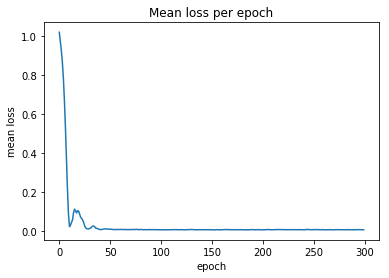

In [7]:
plt.plot(np.arange(num_epochs), [l.data.numpy() for l in losses])
plt.title('Mean loss per epoch')
plt.xlabel('epoch')
plt.ylabel('mean loss')
plt.show()

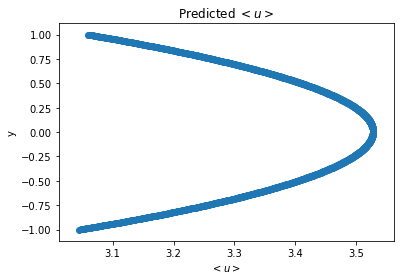

In [8]:
plt.scatter(curves[-1][1].detach().numpy(), curves[-1][0].detach().numpy())
plt.title('Predicted $<u>$')
plt.ylabel('y')
plt.xlabel('$<u>$')
plt.show()